# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [30]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [31]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [32]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [29]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [33]:
top10_hoods = to_data.groupby('neighbourhood').mean().nlargest(10, 'average_house_value')
top10_hoods.rename(columns = {'average_house_value':'Average House Value'}, inplace=True)
top10_hoods.index.names = ['Neighbourhood']

# Calculate the mean number of dwelling types units per year
total_dwelling_types = to_data.groupby('year').mean()
total_dwelling_types.drop(total_dwelling_types.iloc[:, 8:11], axis = 1, inplace=True)


# Calculate the average monthly shelter costs for owned and rented dwellings
avg_shelter_costs = to_data.groupby('year').mean()
avg_shelter_costs.drop(avg_shelter_costs.iloc[:, :9], axis = 1, inplace=True)

### Panel Visualization Functions

In [34]:
# Define Panel visualization functions
# Define Panel visualization functions
mean_hood_values = to_data[['neighbourhood','average_house_value']].groupby('neighbourhood').mean()
hood_locations = df_neighbourhood_locations.set_index('neighbourhood')
mean_values_location = pd.concat([mean_hood_values, hood_locations], axis='columns', join='inner')
mean_values_location.head()

def neighbourhood_map():
    """Neighbourhood Map"""
   
    # YOUR CODE HERE!

def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    
    # YOUR CODE HERE!

def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    
    # YOUR CODE HERE!

def average_house_value():
    """Average house values per year."""
    
    # YOUR CODE HERE!

def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
    # YOUR CODE HERE!

def number_dwelling_types():
    """Number of dwelling types per year"""
    
    # YOUR CODE HERE!

def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    # YOUR CODE HERE!

def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    # YOUR CODE HERE!

def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    # YOUR CODE HERE!

In [ ]:
avg_house_value = to_data['average_house_value'].groupby('year').mean()
#Code to fix

In [35]:
# avg_house_value = to_data['average_house_value'].groupby('year').mean()
avg_house_value_hood = to_data[['neighbourhood', 'average_house_value']]
avg_house_value_hood.columns = ['Neighbourhood', 'Average House Value']
avg_house_value_hood.index.names = ['Year']

In [36]:
def neighbourhood_map():
    """Neighbourhood Map"""

    mean_values_location.reset_index(inplace=True)
    mapbox_values_location = px.scatter_mapbox(
        mean_values_location, 
        lat='lat', 
        lon='lon', 
        color='average_house_value', 
        size='average_house_value', 
        color_continuous_scale=px.colors.cyclical.IceFire,
        title='Average House Values in Toronto',
        hover_data={'neighbourhood': True},
        zoom=9,
        height=750,
        )
    return mapbox_values_location

In [37]:
def create_bar_chart(year, data, color):
    """
    Create a barplot based in the data argument.
    """

    fig = plt.figure()
    barchart = total_dwelling_types.iloc[year].plot.bar(color=color)
    barchart.set_xlabel(f"{data.index[year]}")
    barchart.set_ylabel("Dwelling Type Units")
    barchart.set_title(f"Dwellling Types in Toronto {data.index[year]}")
    return fig

In [38]:
def create_line_chart(column, data, color, title):
    """
    Create a line chart based in the data argument.
    """
    fig = plt.figure()
    barchart = data.plot.line(color=color)
    barchart.set_xlabel('Year')
    barchart.set_ylabel('Dwelling Type Units')
    barchart.set_title(title)
    return fig

In [39]:
def average_house_value(data, color):
    """Average house value.""" 
    fig = plt.figure()
    barchart = data.plot.line(color=color)
    barchart.set_xlabel('Year')
    barchart.set_ylabel('Avg House Value')
    barchart.set_title('Average House Value in Toronto')
    return fig

In [40]:
def average_value_by_neighbourhood():    
    """Average house values by neighbourhood."""
    avg_house_value_hood = to_data[['neighbourhood', 'average_house_value']]
    avg_house_value_hood.columns = ['Neighbourhood', 'Average House Value']
    avg_house_value_hood.index.names = ['Year']
    return avg_house_value_hood.hvplot(x='Year', y='Average House Value', groupby='Neighbourhood', yformatter='%0f')

In [41]:
def number_dwelling_types():
    """Number of dwelling types per year"""
    dwelling_types = to_data.drop(to_data.iloc[:, 9:12], axis = 1, inplace=False)
    return dwelling_types.hvplot.bar(stacked=False, groupby='neighbourhood', yformatter='%0f', rot=90, height=500)

In [42]:
def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    avg_house_value_hood = to_data[['neighbourhood', 'average_house_value']]
    avg_house_value_hood.columns = ['Neighbourhood', 'Average House Value']
    avg_house_value_hood.index.names = ['Year']
    avg_house_value_hood.reset_index(inplace=True)
    return px.bar(
        avg_house_value_hood, 
        x='Neighbourhood', 
        y='Average House Value', 
        color='Average House Value', 
        facet_row='Year', width=1000, 
        height=1000,
        title='Average Toronto House Values per Neighbourhood'
    )


In [43]:
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    top10_hoods = to_data.groupby('neighbourhood').mean().nlargest(10, 'average_house_value')
    top10_hoods.rename(columns = {'average_house_value':'Average House Value'}, inplace=True)
    top10_hoods.index.names = ['Neighbourhood']
    return top10_hoods.hvplot.bar(x='Neighbourhood', y='Average House Value', yformatter='%0f', rot=90, height=500)

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

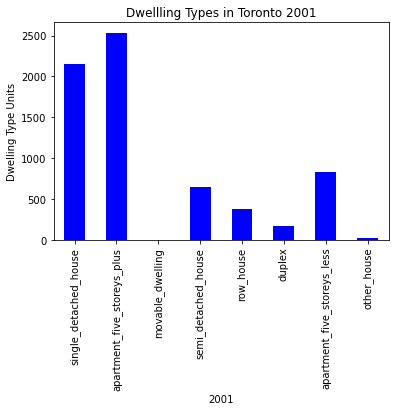

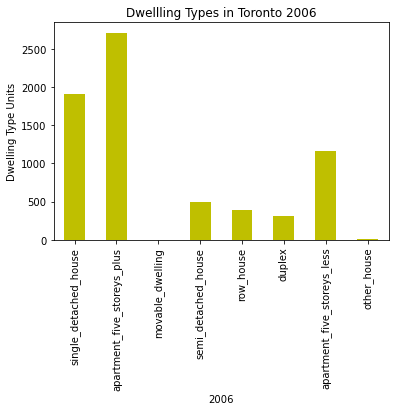

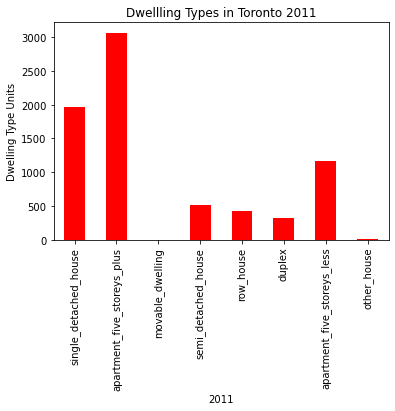

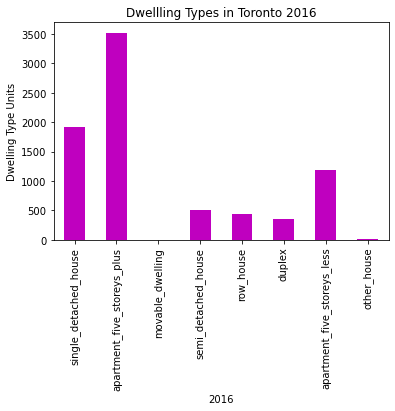

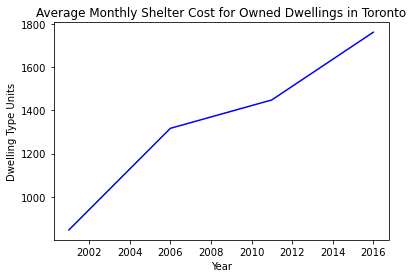

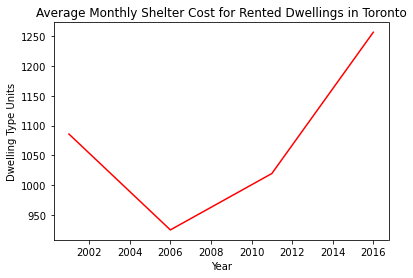

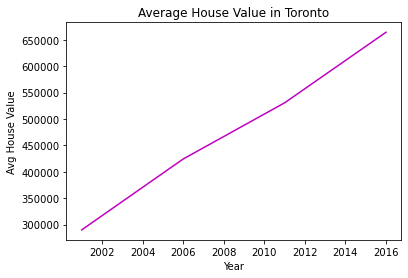

In [47]:
# Create a Title for the Dashboard
dashboard_title = '# Toronto Real Estate Analysis 2001-2016'

# Define a welcome text
welcome_text = '###This dashboard presents a visual historical analysis of house values, dwelling types per neighbourhood and dwelling costs in Toronto, Ontario from census data between 2001-2016. You can navigate through the tabs above to explore more details about the evolution of the real estate market in Toronto across these years.'

# Create a tab layout for the dashboard
neighbourhood_row = pn.Row(welcome_text, neighbourhood_map)
column_hood_plot = pn.Column(dashboard_title, neighbourhood_row)
column_hood_plot


# Create the main dashboard
#Position plots for 1st tab
row_of_bar_1 = pn.Row(create_bar_chart(0,total_dwelling_types, "b"),create_bar_chart(1,total_dwelling_types, "y"))
row_of_bar_2 = pn.Row(create_bar_chart(2,total_dwelling_types, "r"),create_bar_chart(3,total_dwelling_types, "m"))
yearly_analysis_col = pn.Column(row_of_bar_1, row_of_bar_2)

#Position plots for 2nd tab
shelter_costs_col = pn.Column(
    create_line_chart(0,avg_shelter_costs['shelter_costs_owned'],'b', 'Average Monthly Shelter Cost for Owned Dwellings in Toronto'),
    create_line_chart(1, avg_shelter_costs['shelter_costs_rented'], 'r', 'Average Monthly Shelter Cost for Rented Dwellings in Toronto'), 
    average_house_value(avg_house_value, 'm')
    )

#Position plots for 3rd tab
hood_analyis_col = pn.Column(average_value_by_neighbourhood, number_dwelling_types)
hood_analysis_row = pn.Row(hood_analyis_col, average_house_value_snapshot)
hood_analysis_row

#Position plot for 4th tab
top_hoods_row = pn.Row(top_most_expensive_neighbourhoods)

## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Markdown(str)
            [1] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive01576')
    [1] Column
        [0] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
        [1] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
    [2] Column
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
    [3] Row
        [0] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Row(name='interactive01604')
                        [0] HoloViews(DynamicMap, name='interactive01604')
                        [1] Column
                            [0] WidgetBox
                                [0] Select(margin=(20, 20, 20, 20), name='Neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                            [1] VSpacer()
            [1] Column
                [0] Column()
                [1] Row
                    [0] Row(name='interactive01638')
                        [0] HoloViews(DynamicMap, name='interactive01638')
                        [1] Column
                            [0] WidgetBox
                                [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                            [1] VSpacer()
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive01680')
    [4] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive01687')
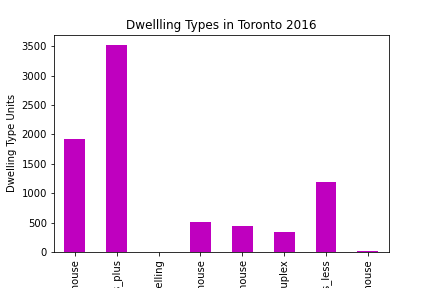
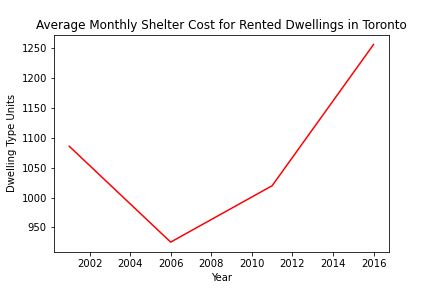
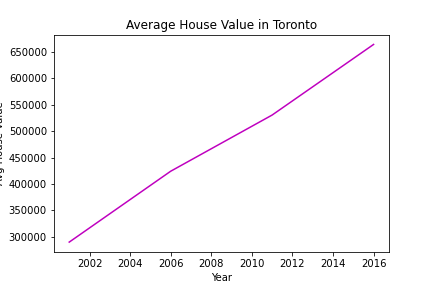
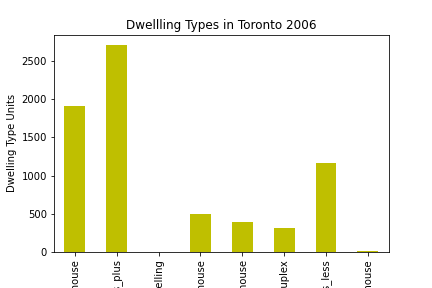
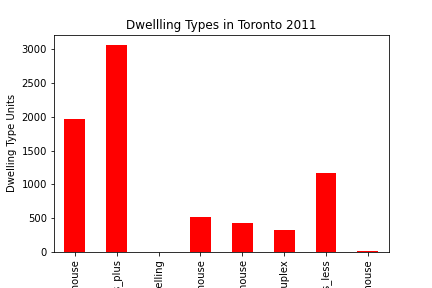
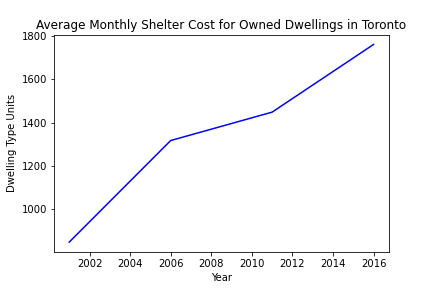
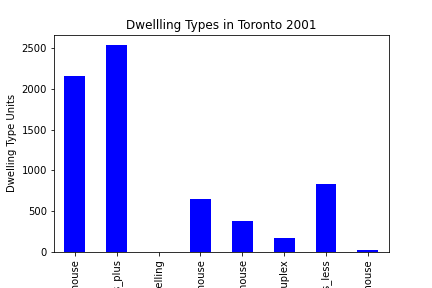

In [50]:
# Create the main dashboard
dashboard = pn.Tabs(
    ('Welcome!', column_hood_plot),
    ('Yearly Market Analysis', yearly_analysis_col),
    ('Shelter Costs Vs. House Value', shelter_costs_col),
    ('Neighbourhood Analysis', hood_analysis_row),
    ('Top Expensive Neighbourhoods', top_hoods_row))
dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Markdown(str)
            [1] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive01576')
    [1] Column
        [0] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
        [1] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
    [2] Column
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
    [3] Row
        [0] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Row(name='interactive01604')
                        [0] HoloViews(DynamicMap, name='interactive01604')
                        [1] Column
                            [0] WidgetBox
                                [0] Select(margin=(20, 20, 20, 20), name='Neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                            [1] VSpacer()
            [1] Column
                [0] Column()
                [1] Row
                    [0] Row(name='interactive01638')
                        [0] HoloViews(DynamicMap, name='interactive01638')
                        [1] Column
                            [0] WidgetBox
                                [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                            [1] VSpacer()
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive01680')
    [4] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive01687')
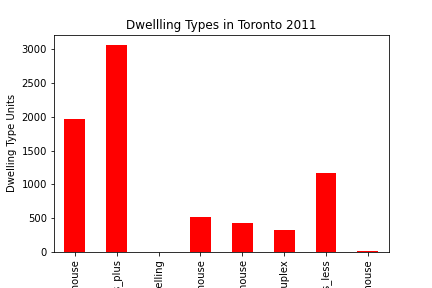
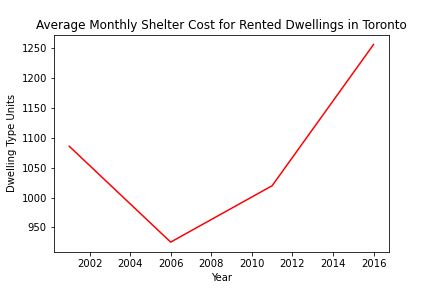
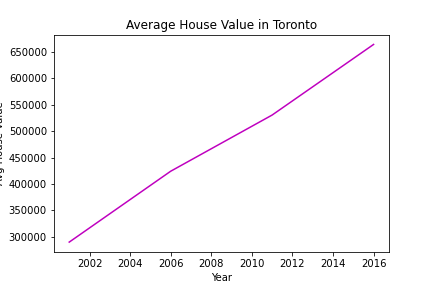
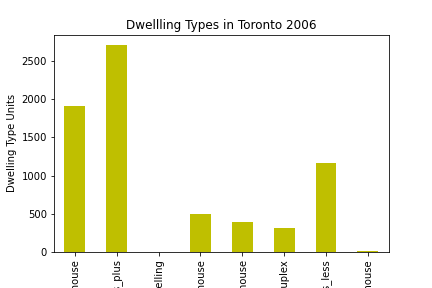
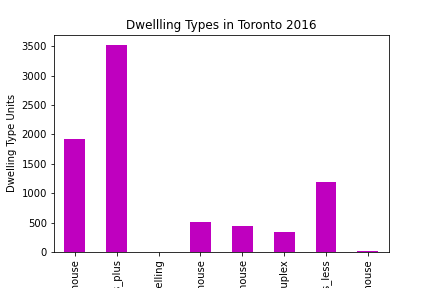
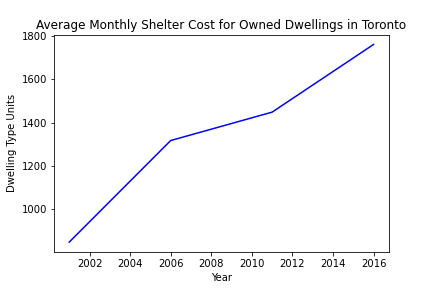
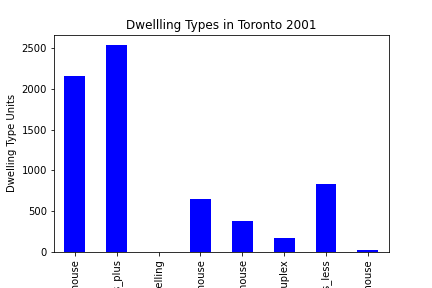

In [51]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# neighbourhood_map().show()

In [ ]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [ ]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [ ]:
# average_house_value()

In [ ]:
# average_value_by_neighbourhood()

In [ ]:
# number_dwelling_types()

In [ ]:
# average_house_value_snapshot()

In [ ]:
# top_most_expensive_neighbourhoods()

In [ ]:
# sunburts_cost_analysis()